In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name_CARGO = "Контейнерные перевозки (просто сегменты).xlsx"
# df = open(file_name_CARGO, encoding='latin-1')
df = pd.read_excel(file_name_CARGO, skiprows=5, skipfooter=11, sheet_name="Сегменты", index_col=0)
df = df.drop(columns={'Рынок итого', "ЕТС итого", "Доля ЕТС"})
df = df.iloc[: , :-26]
df = df.fillna(df.mean())
df = df.T
df = df[['ЛПК', 'Химическая продукция', 'Машиностроение и металлообработка', 'Черная металлургия', 'Жидкие химикаты']]

file_name_TRAFFIC = "грузооборот по россии.xlsx"
TRAFFIC = pd.read_excel(file_name_TRAFFIC, skiprows=29, index_col=0).filter(['дата', 'грузооборот (млрд т-км)'])

file_name_VVP = "ввп.xlsx"
VVP = pd.read_excel(file_name_VVP, skiprows=32, index_col=0).filter(['дата', 'ВВП (млрд руб)'])

new_df = df.merge(TRAFFIC, on=df.index)
new_df = new_df.rename(columns={'key_0': 'дата'})
new_df = new_df.set_index('дата')

new_df_2 = new_df.merge(VVP, on=new_df.index)
new_df_2 = new_df_2.rename(columns={'key_0': 'дата'})
new_df_2 = new_df_2.set_index('дата')
df = new_df_2
# df = df.drop(columns={'Химическая продукция', 'Машиностроение и металлообработка'})
df

,ЛПК,Химическая продукция,Машиностроение и металлообработка,Черная металлургия,Жидкие химикаты,грузооборот (млрд т-км),ВВП (млрд руб)
дата,,,,,,,
2019-01-01,940054.0,358995.0,359975.0,324093.0,396797.0,235.7,8661.645785
2019-02-01,934602.0,373480.0,394487.0,293906.0,369341.0,216.2,8045.220640
2019-03-01,1119164.0,448113.0,424394.0,328754.0,423316.0,250.6,8587.884798
2019-04-01,1153440.0,421184.0,416330.0,349420.0,392853.0,244.1,8455.099695
2019-05-01,1018421.0,439188.0,438876.0,365331.0,406099.0,249.0,9167.024626
2019-06-01,971184.0,476841.0,460116.0,368586.0,407960.0,231.3,8396.587808
2019-07-01,1104764.0,498014.0,492318.0,403504.0,406910.0,239.1,10046.587111
2019-08-01,1089044.0,478482.0,480080.0,365178.0,425611.0,240.5,9198.789527
2019-09-01,1013004.0,457305.0,474989.0,352607.0,391574.0,237.6,9934.447438


In [17]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Веса уравнения линейной регрессии: {lin_reg.coef_}')
print(f'Смещение (betta_0): {lin_reg.intercept_}')
print(f'R^2 статистика: {lin_reg.score(X, y)}')

Веса уравнения линейной регрессии: [ 3.52856438e-01  6.65703564e-01 -1.24611344e-01  3.95682100e-01
  2.86018430e+03 -4.89009221e+01]
Смещение (betta_0): 232451.16986527457
R^2 статистика: 0.7216866181579707


In [4]:
import statsmodels.api as sm

X_constant = sm.add_constant(X[:,0:])
lin_reg = sm.OLS(y,X_constant).fit()
print(lin_reg.summary())
print("\nСреднее остатков: ", lin_reg.resid.mean())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     8.211
Date:                Thu, 19 May 2022   Prob (F-statistic):           0.000179
Time:                        16:41:50   Log-Likelihood:                -315.28
No. Observations:                  26   AIC:                             644.6
Df Residuals:                      19   BIC:                             653.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.325e+05   2.57e+05      0.906      0.3

[ 981343.  962336. 1089840. 1055236. 1062530. 1072750. 1042394. 1084481.
 1011280. 1111865. 1042511. 1097820. 1058194. 1003631. 1103311. 1185111.
 1166040. 1191894. 1174079. 1177373. 1167193. 1198071. 1132401. 1248399.
 1117758. 1071571.] 



 [ 940054.  934602. 1119164. 1153440. 1018421.  971184. 1104764. 1089044.
 1013004. 1081420. 1017650. 1128713. 1009445. 1062245. 1131920. 1207365.
 1123469. 1199645. 1249291. 1171261. 1199454. 1198446. 1143079. 1192498.
 1066159. 1083676.]


<IPython.core.display.Javascript object>


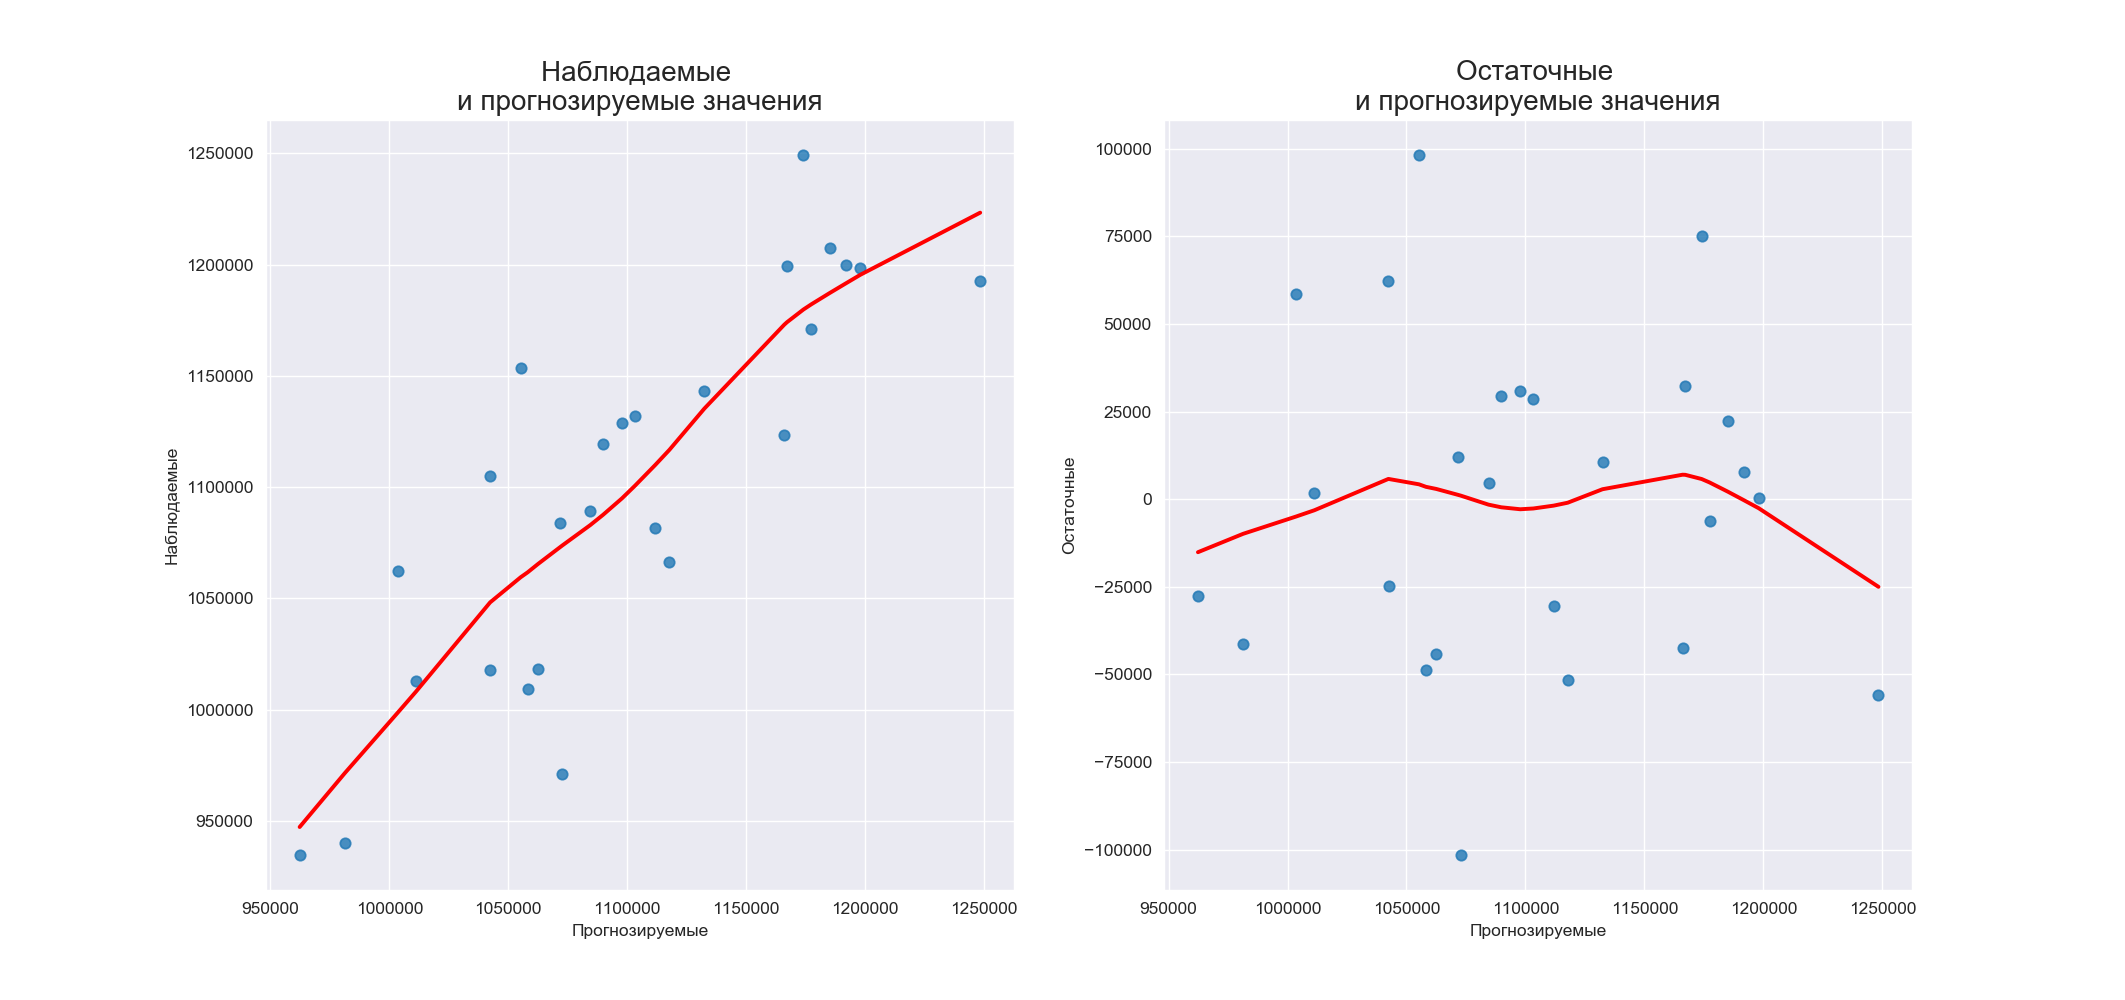

In [72]:
# %matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (17.0, 8.0)

def linearity_test(model, y):
    '''
    Функция для визуальной проверки предположения о линейности в модели линейной регрессии.
    Она отображает наблюдаемые значения по сравнению с прогнозируемыми и остатки по сравнению с прогнозируемыми значениями.
    
    Args:
    * model - подогнанная модель OLS от statsmodels
    * y - наблюдаемые значения
    '''
    fitted_vals = model.predict()
    resids = model.resid
    
    print(fitted_vals.round(0), "\n\n\n\n", y)
    
    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Наблюдаемые \nи прогнозируемые значения', fontsize=16)
    ax[0].set(xlabel='Прогнозируемые', ylabel='Наблюдаемые')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Остаточные \nи прогнозируемые значения', fontsize=16)
    ax[1].set(xlabel='Прогнозируемые', ylabel='Остаточные')
    
linearity_test(lin_reg, y)    

In [73]:
# Обнаружение мультиколлинеарности - наличие линейной зависимости 
# между объясняющими переменными (факторами) регрессионной модели. 
# При этом различают полную коллинеарность, которая означает наличие 
# функциональной (тождественной) линейной зависимости и частичную 
# или просто мультиколлинеарность — наличие сильной корреляции между факторами.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=df.columns[1:]).T

,Химическая продукция,Машиностроение и металлообработка,Черная металлургия,Жидкие химикаты,грузооборот (млрд т-км),ВВП (млрд руб)
vif,602.589582,5.775589,4.787289,1.332399,1.615366,2.002298



 Тест Бройша — Пагана ----
                                  value
Lagrange multiplier statistic  2.153547
p-value                        0.905049
f-value                        0.285978
f p-value                      0.936406

 Тест Голдфелда — Куандта ----
                value
F statistic  0.313172
p-value      0.908254

 Графики остатков ----


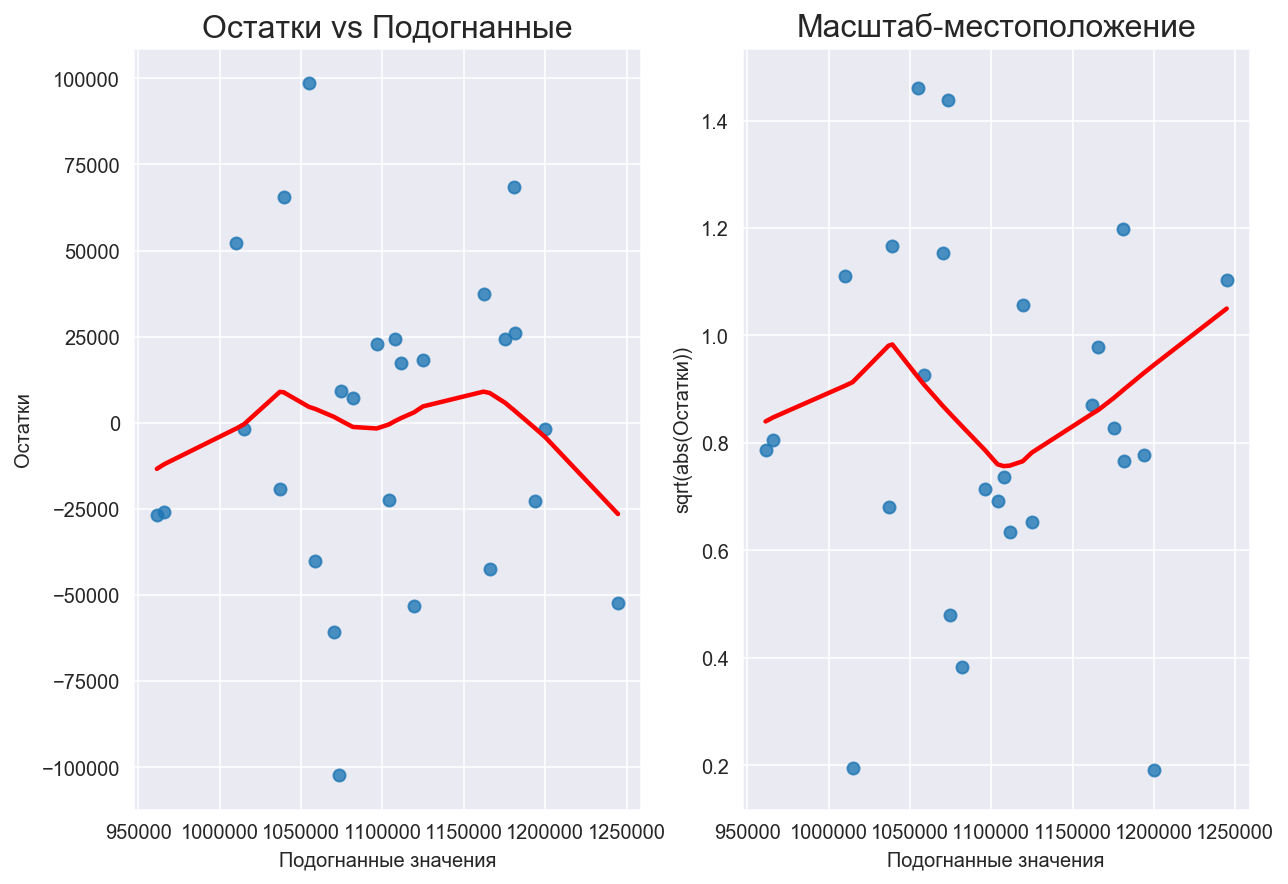

In [6]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (17.0, 8.0)

# import seaborn as sns 
# import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (10.0, 7.0)

def homoscedasticity_test(model):
    '''
    Функция для проверки гомоскедастичности остатков в модели линейной регрессии.
    Он отображает остатки и стандартизированные остатки в зависимости от подобранных значений и выполняет тесты Бреуша-Пагана и Гольдфельда-Квандта.
    
    Args:
    * model - подогнанная модель OLS от statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Остатки vs Подогнанные', fontsize=16)
    ax[0].set(xlabel='Подогнанные значения', ylabel='Остатки')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Масштаб-местоположение', fontsize=16)
    ax[1].set(xlabel='Подогнанные значения', ylabel='sqrt(abs(Остатки))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Тест Бройша — Пагана ----')
    print(bp_test)
    print('\n Тест Голдфелда — Куандта ----')
    print(gq_test)
    print('\n Графики остатков ----')

homoscedasticity_test(lin_reg)

<IPython.core.display.Javascript object>


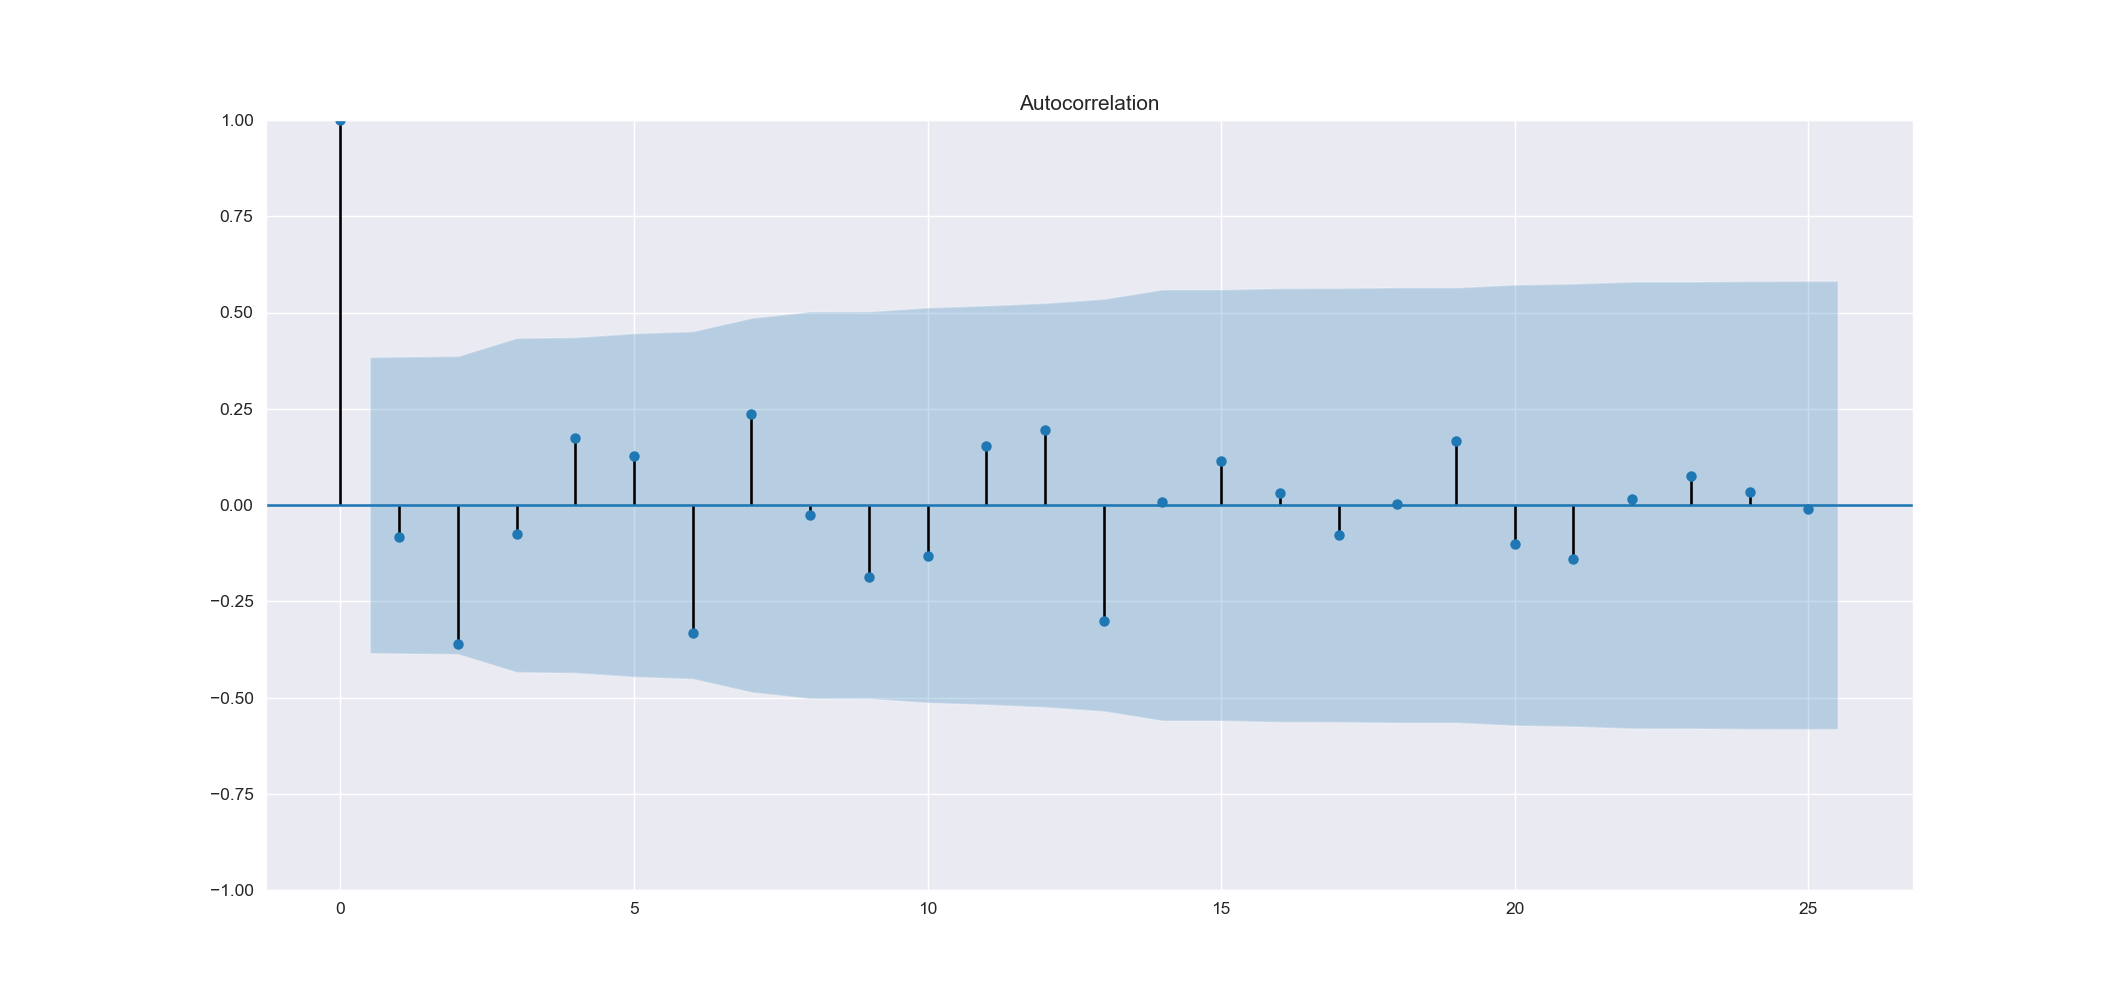

In [75]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=25 , alpha=0.05)
acf.show()

In [76]:
import numpy as np
from statsmodels.stats.stattools import durbin_watson
  
g = np.array(lin_reg.resid)
# Using statsmodels.durbin_watson() method
gfg = durbin_watson(g)
  
print(gfg)

2.132590347719417
